# Import libraries 

`nltk` is a natural language processing toolkit: http://www.nltk.org/
In this example, we will use NLTK for part-of-speech tagging and for lemmatization.

`re` is a library for regular expressions.

`math`, `scipy`, and `numpy` have useful math, statistics, and linear algebra functions.


In [1]:
import nltk
import re
import math
import scipy
import numpy as np

# Data pre-processing

1. Read in text.
2. Extract sentences and tokens.
3. Lowercase all tokens.
4. Tag each token with its POS tag.
5. Lemmatize each token.


In [2]:
# Read in our text file
filename = 'data/crow_retelling.txt'
with open(filename, 'r') as f:
    text = f.read()
print(text)

All flyers were given a purpose and the crow was left without one. He went to visit a bear and the bear spent weeks teaching him about medicine. The crow was still mad without having a purpose. One day he heard a squirrel crying in a hollow oak tree. He went to go see and saw the squirrel was sad about something.  He directed the squirrel to the bear, who was good with medicine. The next the day crow flew around satisfied with knowing that he had helped someone. He heard bunny crying in their burrow. He asked asked why and they said that they could never they could never get any peace with the fox always prying around. Then the crow stated the bunny's strengths of big ears and strong legs. Then word came around of crow's purpose of helping others find their purpose.


In [3]:
# Split the text into sentences
sentences = text.split('. ')
print(sentences)

['All flyers were given a purpose and the crow was left without one', 'He went to visit a bear and the bear spent weeks teaching him about medicine', 'The crow was still mad without having a purpose', 'One day he heard a squirrel crying in a hollow oak tree', 'He went to go see and saw the squirrel was sad about something', ' He directed the squirrel to the bear, who was good with medicine', 'The next the day crow flew around satisfied with knowing that he had helped someone', 'He heard bunny crying in their burrow', 'He asked asked why and they said that they could never they could never get any peace with the fox always prying around', "Then the crow stated the bunny's strengths of big ears and strong legs", "Then word came around of crow's purpose of helping others find their purpose."]


Now, we can tokenize our text (i.e., split into tokens) and lowercase. We use NLTK's word tokenizer. 

In [4]:
# Split our text into lowercased tokens
tokens = []
for token in nltk.word_tokenize(text):
    tokens += [token.lower()]
print(tokens)

['all', 'flyers', 'were', 'given', 'a', 'purpose', 'and', 'the', 'crow', 'was', 'left', 'without', 'one', '.', 'he', 'went', 'to', 'visit', 'a', 'bear', 'and', 'the', 'bear', 'spent', 'weeks', 'teaching', 'him', 'about', 'medicine', '.', 'the', 'crow', 'was', 'still', 'mad', 'without', 'having', 'a', 'purpose', '.', 'one', 'day', 'he', 'heard', 'a', 'squirrel', 'crying', 'in', 'a', 'hollow', 'oak', 'tree', '.', 'he', 'went', 'to', 'go', 'see', 'and', 'saw', 'the', 'squirrel', 'was', 'sad', 'about', 'something', '.', 'he', 'directed', 'the', 'squirrel', 'to', 'the', 'bear', ',', 'who', 'was', 'good', 'with', 'medicine', '.', 'the', 'next', 'the', 'day', 'crow', 'flew', 'around', 'satisfied', 'with', 'knowing', 'that', 'he', 'had', 'helped', 'someone', '.', 'he', 'heard', 'bunny', 'crying', 'in', 'their', 'burrow', '.', 'he', 'asked', 'asked', 'why', 'and', 'they', 'said', 'that', 'they', 'could', 'never', 'they', 'could', 'never', 'get', 'any', 'peace', 'with', 'the', 'fox', 'always', '

**POS tagging**: Assign parts of speech to each token, such as noun, verb, adjective, etc.

In [5]:
# Tag our tokens with the Stanford POS tagger: https://stanfordnlp.github.io/CoreNLP/

pos_tagger_model = "libraries/stanford-postagger-2012-01-06/models/english-left3words-distsim.tagger"
pos_tagger_jar_file = "libraries/stanford-postagger-2012-01-06/stanford-postagger.jar"
pos_tagger = nltk.tag.StanfordPOSTagger(pos_tagger_model, path_to_jar=pos_tagger_jar_file)

pos_tagged_tokens = pos_tagger.tag(tokens)
print("First 15 (token, tag) pairs:")
print(pos_tagged_tokens[:15])

First 15 (token, tag) pairs:
[('all', 'DT'), ('flyers', 'NNS'), ('were', 'VBD'), ('given', 'VBN'), ('a', 'DT'), ('purpose', 'NN'), ('and', 'CC'), ('the', 'DT'), ('crow', 'NN'), ('was', 'VBD'), ('left', 'VBN'), ('without', 'IN'), ('one', 'CD'), ('.', '.'), ('he', 'PRP')]


Now, we're going to filter out the punctuation tags. 
We can rely on the POS to determine whether or not a token is a punctuation. We remove any (word, tag) pair in which the tag it not made up of characters.

**Lemmatization**: Normalizing a token by removing inflectional endings and returning the base or dictionary form of a word, which is known as the lemma.



In [6]:
# Read in the WordNet lemmatizer
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

# This is a helper function used to convert the POS tags from the Stanford parser to the WordNet format
def pos_stanford2wordnet(treebank_tag):
    '''Map the Stanford POS tags to WordNet tags.'''
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        # default
        return nltk.corpus.wordnet.NOUN

In [7]:
# Filter out any punctuation tags
regex_pos_content = re.compile(r'^[a-zA-Z$]+$')
pos_tokens = [] 
lemmatized_tokens = [] 
for token, tag in pos_tagged_tokens:
    
    if regex_pos_content.findall(tag):
        pos_tokens += [(token, tag)]
        lemmatized_tokens += [lemmatizer.lemmatize(token, pos_stanford2wordnet(tag))]

print('pos_tokens:')
print(pos_tokens[:15])
print('\nlemmatized_tokens:')
print(lemmatized_tokens[:15])

pos_tokens:
[('all', 'DT'), ('flyers', 'NNS'), ('were', 'VBD'), ('given', 'VBN'), ('a', 'DT'), ('purpose', 'NN'), ('and', 'CC'), ('the', 'DT'), ('crow', 'NN'), ('was', 'VBD'), ('left', 'VBN'), ('without', 'IN'), ('one', 'CD'), ('he', 'PRP'), ('went', 'VBD')]

lemmatized_tokens:
['all', 'flyer', 'be', 'give', 'a', 'purpose', 'and', 'the', 'crow', 'be', 'leave', 'without', 'one', 'he', 'go']


In [8]:
print("What we've done so far:")
print('Sentence: ', sentences[0])
print('Lowercased tokens: ', tokens[:13])
print('POS tagged tokens: ', pos_tokens[:13])
print('Lemmatized tokens: ', lemmatized_tokens[:13])

What we've done so far:
Sentence:  All flyers were given a purpose and the crow was left without one
Lowercased tokens:  ['all', 'flyers', 'were', 'given', 'a', 'purpose', 'and', 'the', 'crow', 'was', 'left', 'without', 'one']
POS tagged tokens:  [('all', 'DT'), ('flyers', 'NNS'), ('were', 'VBD'), ('given', 'VBN'), ('a', 'DT'), ('purpose', 'NN'), ('and', 'CC'), ('the', 'DT'), ('crow', 'NN'), ('was', 'VBD'), ('left', 'VBN'), ('without', 'IN'), ('one', 'CD')]
Lemmatized tokens:  ['all', 'flyer', 'be', 'give', 'a', 'purpose', 'and', 'the', 'crow', 'be', 'leave', 'without', 'one']


And we're done with pre-processing!

Now, we can go ahead and extract linguistic features!

# Linguistic feature extraction



In [49]:
def print_linguistic_features(feat_dict):
    print("Linguistic features")
    for feature in feat_dict:
        print(feature, ': ', feat_dict[feature])
linguistic_features = {}

Let's start by retrieving the total number of sentences and of tokens, and the average length of each token

In [50]:
num_sentences = len(sentences)
print("# of sentences: ", num_sentences)
linguistic_features['num_sentences'] = num_sentences

# of sentences:  11


In [51]:
num_tokens = len(lemmatized_tokens) # Recall: lemmatized_tokens has all punctuation removed
print("# of tokens: ", num_tokens)
linguistic_features['num_tokens'] = num_tokens

# of tokens:  147


In [52]:
# Word length
word_length_sum = 0
for pos_token in pos_tokens:
    token = pos_token[0]
    word_length_sum += len(token)
average_word_length = word_length_sum / num_tokens
print('Average word length: ', average_word_length )
linguistic_features['average_word_length'] = average_word_length


Average word length:  4.210884353741497


## Vocabulary richness

We'll look at a few metrics for measuring vocabulary richness.

- The **type-token-ratio (TTR)** computes the ratio of the total number of types (i.e., unique words) over the total number of tokens (i.e., all words). The **moving average type-token-ratio (MATTR)** computes the TTR over a window of size k, and averages over the total number of windows

- The **Brunet index** computes vocabulary richness according to the following equation: \begin{equation}N^{(U^{-0.165})}\end{equation} where *N* is total number of words and *U* is the total number of unique words.

- The **Honoré statistic** computes vocabulary richness according to the following equation:
\begin{equation}\frac{100 \log N}{1 - \frac{N_1}{U}}\end{equation} 
where *N* is the total number of words, *U* is the total number of unique words, and *N1* is the number of *hapax legomenon* (i.e., words only used once)



Let's start with computing TTR and MATTR. We first compute the total number of **types** and the total number of **tokens**

In [55]:
num_word_types = len(set(pos_tokens)) 
print('Total # word types: ', num_word_types)
print('Total # work tokens: ', num_tokens) # We already computed num_tokens before

Total # word types:  84
Total # work tokens:  147


In [56]:
ttr = num_word_types / num_tokens
linguistic_features['TTR'] = num_word_types / num_tokens
print('TTR: ', ttr)

TTR:  0.5714285714285714


Now that we know how to compute TTR, let's look at how we can computer MATTR. 

In this example, we will compute MATTR with a window size of 20. We start by initializing a few variables. 
We will compute the TTR for every window of size 20. We need to keep track of the total sum and of the total number of windows.

In [57]:
window_size = 20

MATTR_sum = 0
num_windows = 0

In [58]:
start = 0
end = window_size
while end < len(pos_tokens):
    num_word_types_window = len(set(pos_tokens[start:end]))
    num_tokens_window = window_size

    MATTR_sum += (num_word_types_window / num_tokens_window)
    # Shift window one word at a time
    start += 1
    end += 1
    num_windows += 1

mattr = MATTR_sum / num_windows
print('MATTR with window size %d: %f' %  (window_size, mattr))
linguistic_features['MATTR_%d' % window_size] = mattr

MATTR with window size 20: 0.859449


Now, let's compute **Brunet's Index**.

In [59]:
# Brunet
brunet = num_tokens ** ( num_word_types**(-0.165))
print("Brunet: ", brunet)
linguistic_features['brunet'] = brunet

Brunet:  11.048856489696162


Here, we compute the **Honoré statistic**. To do so, we first need to compute the number of words that occur once. We will use the `FreqDist` function in `nltk`, which computes the frequency of each word.

In [60]:
fd_tokens = nltk.probability.FreqDist(pos_tokens)
for fd_token, pos_token in zip(list(fd_tokens.values())[:5], pos_tokens[:5]): # Show frequency of first 5 words
    print("POS token: ", pos_token, ", frequency: ", fd_token)

POS token:  ('all', 'DT') , frequency:  1
POS token:  ('flyers', 'NNS') , frequency:  1
POS token:  ('were', 'VBD') , frequency:  1
POS token:  ('given', 'VBN') , frequency:  1
POS token:  ('a', 'DT') , frequency:  5


Now, let's count the number of *hapax legomenon* (i.e., words appearing once)

In [61]:
words_appearing_once = 0
for num in fd_tokens.values():
    if num == 1:
        words_appearing_once += 1
print("Words appearing once: ", words_appearing_once)
 

Words appearing once:  54


In [62]:
honore = 100.0 * math.log(num_tokens)/(1.0 - 1.0 * words_appearing_once / num_word_types)
print('Honoré: ', honore)
linguistic_features['honore'] = honore

Honoré:  1397.3211242980462


Let's look at all the features we've extracted so far.

In [63]:
print_linguistic_features(linguistic_features)

Linguistic features
num_tokens :  147
average_word_length :  4.210884353741497
TTR :  0.5714285714285714
MATTR_20 :  0.8594488188976377
brunet :  11.048856489696162
honore :  1397.3211242980462


## Cosine similarity

Given two vectors *A*, *B*, we can measure the cosine similarity:
\begin{equation}
cos(A,B) = \frac{A \dot B}{||A|| \ ||B||}
\end{equation}

In order to do this, we first need to convert our words into word vectors. We will start by defining our **vocabulary**, i.e. all unique *non-frequent* words that occur in our transcript.


In [64]:
# Define list of words to remove (we ignore words that occur very frequently)
words_to_remove = ['the', 'and', 'is', 'a', 'to', 'i', 'on', 'in', 'of', 'it']

# Get a list of unique words
vocab_words = list(set(lemmatized_tokens))

# Remove frequent words
for s in words_to_remove:
    if s in vocab_words:
        vocab_words.remove(s)
   
print("Original text:")
print(text.lower())
print("\nVocabulary:")
print(vocab_words)

Original text:
all flyers were given a purpose and the crow was left without one. he went to visit a bear and the bear spent weeks teaching him about medicine. the crow was still mad without having a purpose. one day he heard a squirrel crying in a hollow oak tree. he went to go see and saw the squirrel was sad about something.  he directed the squirrel to the bear, who was good with medicine. the next the day crow flew around satisfied with knowing that he had helped someone. he heard bunny crying in their burrow. he asked asked why and they said that they could never they could never get any peace with the fox always prying around. then the crow stated the bunny's strengths of big ears and strong legs. then word came around of crow's purpose of helping others find their purpose.

Vocabulary:
['all', 'burrow', 'without', 'bear', 'cry', 'visit', 'say', 'fox', 'ear', 'could', 'squirrel', 'week', 'prying', 'never', 'purpose', 'then', 'peace', 'teach', 'medicine', "'s", 'get', 'oak', 'som

Now that we have our vocabulary, let's convert each sentence in our transcript into a vector!

For every sentence, we will create a vector which has the same size as our vocabulary. At every position, we will assign 1 if the corresponding word occurs, and 0 if it does not.

*Example*:

**V** =  ["cat", "fat", "red", "blue"]

- "The fat cat" = [1, 1, 0, 0]
- "The red fat cat" = [1, 1, 1, 0]
- "The blue fat cat" = [1, 1, 0, 1]


In [65]:
word_vectors = []
for i, sentence in enumerate(sentences):
    word_vectors.append(len(vocab_words)*[0]) # init
    for j in range(len(vocab_words)):
        if vocab_words[j] in sentence.lower():
            word_vectors[i][j] += 1
            
# Vector is 1 if the vocabulary word is present in the utterance, 0 otherwise
print("Vocabulary: ", vocab_words)
print("\nsentence1: ", sentences[0].lower())
print("Vector of sentence1: ", word_vectors[0])


Vocabulary:  ['all', 'burrow', 'without', 'bear', 'cry', 'visit', 'say', 'fox', 'ear', 'could', 'squirrel', 'week', 'prying', 'never', 'purpose', 'then', 'peace', 'teach', 'medicine', "'s", 'get', 'oak', 'someone', 'why', 'strong', 'strength', 'one', 'state', 'direct', 'crow', 'go', 'see', 'about', 'around', 'their', 'bunny', 'flyer', 'day', 'have', 'who', 'something', 'help', 'ask', 'always', 'others', 'come', 'any', 'give', 'hollow', 'still', 'word', 'fly', 'that', 'know', 'with', 'leg', 'hear', 'mad', 'next', 'they', 'saw', 'leave', 'find', 'tree', 'he', 'him', 'big', 'sad', 'satisfy', 'spend', 'be', 'good']

sentence1:  all flyers were given a purpose and the crow was left without one
Vector of sentence1:  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


Now that we have our word vectors, we can compute the cosine distance between each vector pair.

In [66]:
# Calculate cosine distance between each pair of sentences in this transcribe
pairs_compared = 0
cosine_distance_sum = 0
for i in range(len(sentences)):
    for j in range(i):
        # We only compute distance if norms are non-zero
        norm_i, norm_j = np.linalg.norm(word_vectors[i]), np.linalg.norm(word_vectors[j])
        if norm_i > 0 and norm_j > 0:
            pairs_compared += 1
            cosine_distance_sum += scipy.spatial.distance.cosine(word_vectors[i], word_vectors[j])

average_cosine_distance = cosine_distance_sum / pairs_compared
print("Average cosine distance: ", average_cosine_distance)
linguistic_features['average_cosine_distance'] = cosine_distance_sum / pairs_compared

Average cosine distance:  0.7932121704196343


All of that just for one feature! ;)

In [67]:
print_linguistic_features(linguistic_features)

Linguistic features
num_tokens :  147
average_word_length :  4.210884353741497
TTR :  0.5714285714285714
MATTR_20 :  0.8594488188976377
brunet :  11.048856489696162
honore :  1397.3211242980462
average_cosine_distance :  0.7932121704196343


## Valence

In this example, we will compute the mean valence of the transcript. We rely on Warriner norms of valence, which provide values of valence for ~13,000 words.
- Warriner norms are also used to compute arousal and dominance.
- We use the same approach to compute imageability, frequency, age-of-acquisition, subjectivity (except we use norms from other sources).

Let's start off by reading in the Warriner norms.

In [70]:
# Helper function for reading in dictionary of Warriner norms
def get_norms(path_to_norms):
    """Parameters:
    path_to_norms : optional, string. Full path, including filename, of the Warringer norms.

    Return dictionary of Warriner norms, order: [warr.V.Mean.Sum,warr.V.SD.Sum,warr.V.Rat.Sum,warr.A.Mean.Sum,warr.A.SD.Sum,warr.A.Rat.Sum,warr.D.Mean.Sum,warr.D.SD.Sum,warr.D.Rat.Sum]"""

    source_norms = path_to_norms
    with open(source_norms, "r") as fin:
        f = fin.readlines()
        f = f[1:] # skip header

        warr = {}
        for line in f:
            l = line.strip().split(',')
            warr[l[1]] = l[2:11]

        return warr

warriner_norms = get_norms('libraries/Ratings_Warriner_et_al.csv')
print("Warriner norms: word: [valence (mean), valence (sd), arousal (mean), arousal (sd), dominance (mean), dominance (sd)]")
for word in list(warriner_norms.keys())[:5]:
    print(word, ': ', warriner_norms[word])

Warriner norms: word: [valence (mean), valence (sd), arousal (mean), arousal (sd), dominance (mean), dominance (sd)]
aardvark :  ['6.26', '2.21', '19', '2.41', '1.4', '22', '4.27', '1.75', '15']
abalone :  ['5.3', '1.59', '20', '2.65', '1.9', '20', '4.95', '1.79', '22']
abandon :  ['2.84', '1.54', '19', '3.73', '2.43', '22', '3.32', '2.5', '22']
abandonment :  ['2.63', '1.74', '19', '4.95', '2.64', '21', '2.64', '1.81', '28']
abbey :  ['5.85', '1.69', '20', '2.2', '1.7', '20', '5', '2.02', '25']


In [72]:
# Let's get the mean valence of our transcript
warriner_valence_sum = 0
warriner_valence_words = 0
for word in lemmatized_tokens:
    if word in warriner_norms:
        warriner_valence_sum += float(warriner_norms[word][0])
        warriner_valence_words += 1

average_warriner_valence = warriner_valence_sum / warriner_valence_words
print("Average Warriner valence: ", average_warriner_valence)
linguistic_features['average_warriner_valence'] = average_warriner_valence


Average Warriner valence:  5.878783783783784


## Phrase type length

In this example, we will look at the average length of noun phrases.

In the feature extraction pipeline, we extract parse trees using the Stanford parser. For this demo, let's assume we already have the Stanford parser output in `data/crow_retelling.txt.parse` :)

(ROOT (S (S (NP (DT All) (NNS flyers)) (VP (VBD were) (VP (VBN given) (NP (DT a) (NN purpose))))) (CC and) (S (NP (DT the) (NN crow)) (VP (VBD was) (VP (VBN left) (PP (IN without) (NP (CD one)))))) (. .)))



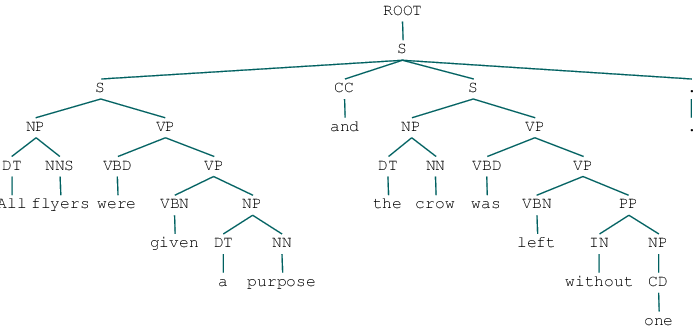

In [76]:
# Load parse tree output
with open('data/crow_retelling.txt.parse', 'r') as fin:
    treelist = fin.readlines()

print(treelist[0])
nltk.tree.ParentedTree.fromstring(treelist[0])

Let's go through every node in our tree.

We compute the number of leaves in any subtree whose root is NP. I print an example subtree and the length of that subtree.

In [79]:
length_np_sum = 0
np_sum = 0
print_first = True
for tree in treelist:
    t = nltk.tree.Tree.fromstring(tree)
    for st in t.subtrees():
        if str(st).startswith("(NP"):
            if print_first:
                print("Subtree")
                print(st)
                print("Length of subtree: ", len(st.leaves()))
                print_first = False
            length_np_sum += len(st.leaves())
            np_sum += 1

average_length_np = length_np_sum / np_sum
print("")
print("Average length of NP: ", average_length_np)
linguistic_features['average_length_np'] = average_length_np


Subtree
(NP (DT All) (NNS flyers))
Length of subtree:  2

Average length of NP:  2.909090909090909


Here are all the features we've extracted!

In [80]:
print_linguistic_features(linguistic_features)

Linguistic features
num_tokens :  147
average_word_length :  4.210884353741497
TTR :  0.5714285714285714
MATTR_20 :  0.8594488188976377
brunet :  11.048856489696162
honore :  1397.3211242980462
average_cosine_distance :  0.7932121704196343
average_warriner_valence :  5.878783783783784
average_length_np :  2.909090909090909
